# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :

\begin{align*}
U_c(0,1)&=U_c(1,0)=\beta \\
U_c(1,1)&=U_c(0,0)=0
\end{align*}


(the potential for singleton clique is 0).


In [1]:
import math
import os
import platform
import random
import tempfile

import imageio
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi


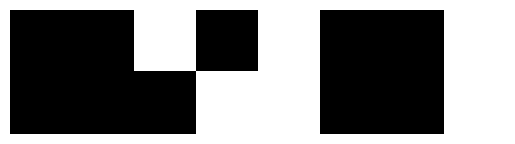

In [2]:
plt.set_cmap("gray")

sh = [2, 8]

imaU = 2 - np.ceil(2 * np.random.rand(*sh))
plt.imshow(imaU)

plt.axis("off")
plt.show()


- Q1: For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.

- A1: $U(x)=\sum\limits_{c\in\mathcal{C}}V_c(x)=10\beta$

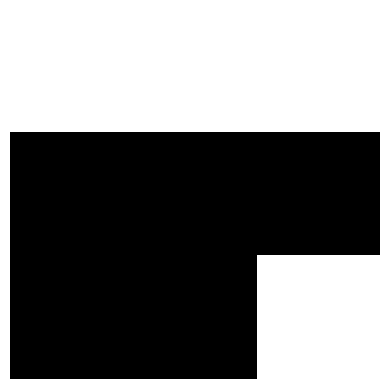

In [3]:
sh = [3, 3]

imaVois = 2 - np.ceil(2 * np.random.rand(*sh))
plt.imshow(imaVois)

plt.axis("off")
plt.show()


- Q2: Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood, order 2).

- A2: Taking the pixel on the center of the previous image, with $V_s=(1, 1, 1, 0, 0, 0, 0, 1)$, we have:


  \begin{align*}
  U_s(x_s=0, V_s)&=4\beta \\
  U_s(x_s=1, V_s)&=4\beta
  \end{align*}

  Thus, as the conditional probability is defined by $P(X_s=x_s|V_s)=\frac{1}{Z^s}\exp(-U_s(x_s,V_s))$, with $Z^s=\sum\limits_{\xi\in E}\exp(-U_s(\xi, V_s))$, it follows that:

  \begin{align*}
  P(X_s=0|V_s)&=\frac{1}{\exp(-4\beta) + \exp(-4\beta)}\exp(-4\beta) \\
  P(X_s=1|V_s)&=\frac{1}{\exp(-4\beta) + \exp(-4\beta)}\exp(-4\beta)
  \end{align*}

## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



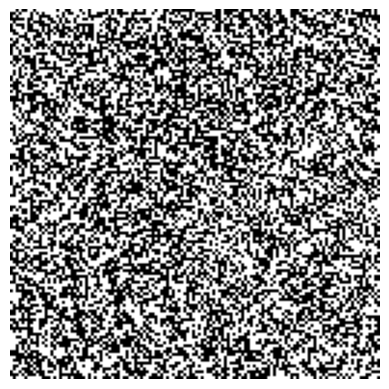

In [4]:
sh = [128, 128]

im_bin = 2 - np.ceil(2 * np.random.rand(*sh))

plt.figure()
plt.imshow(im_bin)
plt.set_cmap("gray")
plt.axis("off")
plt.show()


### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [5]:
def echan(im_bin, beta_reg):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1 = (i - 1) % im_bin.shape[0]
            i2 = (i + 1) % im_bin.shape[0]
            j1 = (j - 1) % im_bin.shape[1]
            j2 = (j + 1) % im_bin.shape[1]

            # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = (
                im_bin[i, j1] + im_bin[i, j2] + im_bin[i1, j] + im_bin[i2, j]
            ) * beta_reg
            p0 = math.exp(-Ureg0)

            # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = (
                4 - (im_bin[i, j1] + im_bin[i, j2] + im_bin[i1, j] + im_bin[i2, j])
            ) * beta_reg
            p1 = math.exp(-Ureg1)

            # sampling according to the normalized probabilities
            if p0 + p1 != 0.0:
                if random.uniform(0, 1) < p0 / (p0 + p1):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin



By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

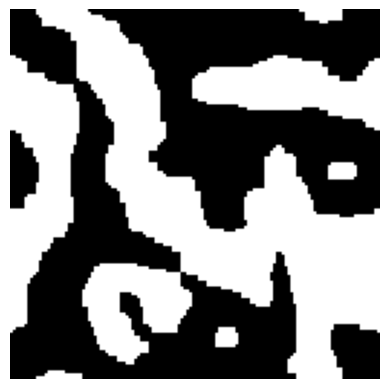

In [6]:
# random initialization of im_bin
sh = [128, 128]
im_bin = 2 - np.ceil(2 * np.random.rand(*sh))

beta_reg = 10

for n in range(50):
    echan(im_bin, beta_reg)

plt.figure()
plt.imshow(im_bin)
plt.set_cmap("gray")
plt.axis("off")
plt.show()


- Q3: Run the program several times. Do you still get the same image? Comment on this.

- A3: By running the program several times, different images are obtained. Not only is the initialization of `im_bin` randomized, meaning the initial state is variable; but also the result of the `echan` function provides sampling based on probabilities, leading to potentially different outcomes for different realizations. Thus, different executions of the program should (probabilistically) yield different results.


- Q4: Vary $\beta$ from 0.5 to 20. Comment on the results.

- A4: By varying the value of $\beta$, one can observe that: when set to a very low value such as $0.5$, the outcome closely resembles the randomized image at the inception. With an increment in $\beta$, there is a notable increase in the size of homogeneous areas within the result.

  |  <img src="./images/3.png" width="200"/>   | <img src="./images/3-0.5.png" width="200"/> |
  | :----------------------------------------: | :-----------------------------------------: |
  | <img src="./images/3-10.png" width="200"/> | <img src="./images/3-20.png" width="200"/>  |


- Q5 Which image minimizes the overall energy for this model?

- A5: The energy of the image is directly proportional to its variance. Therefore, an image characterized by lower variance—indicating larger and more homogeneous regions—would exhibit correspondingly lower energy.

- Q6: Change $\beta$ and give it a negative value. Describe the result and justify it.

- A6: By changing the sign of $\beta$ and giving it a negative value, the sampling process gives precedence to the less frequent category, in contrast to the prioritization of the most frequent category observed in Ising's model. This leads to the generation of a highly heterogeneous image characterized by elevated variance and energy levels.

  |  <img src="./images/3.png" width="200"/>   | <img src="./images/4-0.5.png" width="200"/> |
  | :----------------------------------------: | :-----------------------------------------: |
  | <img src="./images/4-10.png" width="200"/> | <img src="./images/4-20.png" width="200"/>  |


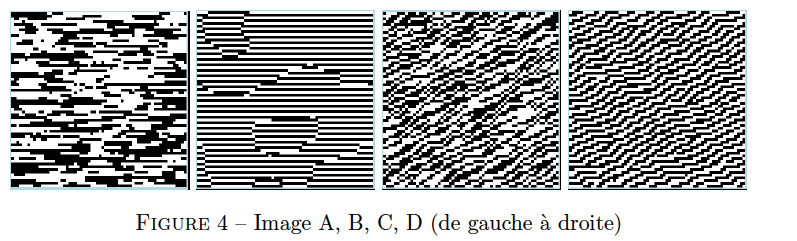

- Q7: We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.

  - Image A : there is only one clique potential of order 2 which is -1. Indicate which one.
  - Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
  - Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
  - Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.

In [7]:
def echan_q7a(im_bin, beta_reg):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1 = (i - 1) % im_bin.shape[0]
            i2 = (i + 1) % im_bin.shape[0]
            j1 = (j - 1) % im_bin.shape[1]
            j2 = (j + 1) % im_bin.shape[1]

            # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = -(2 - (im_bin[i, j1] + im_bin[i, j2])) * beta_reg
            p0 = math.exp(-Ureg0)

            # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = -(im_bin[i, j1] + im_bin[i, j2]) * beta_reg
            p1 = math.exp(-Ureg1)

            # sampling according to the normalized probabilities
            if p0 + p1 != 0.0:
                if random.uniform(0, 1) < p0 / (p0 + p1):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin


def echan_q7b(im_bin, beta_reg):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1 = (i - 1) % im_bin.shape[0]
            i2 = (i + 1) % im_bin.shape[0]
            j1 = (j - 1) % im_bin.shape[1]
            j2 = (j + 1) % im_bin.shape[1]

            # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = (
                -(2 - (im_bin[i, j1] + im_bin[i, j2]))
                + (2 - (im_bin[i1, j] + im_bin[i2, j]))
            ) * beta_reg
            p0 = math.exp(-Ureg0)

            # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = (
                -(im_bin[i, j1] + im_bin[i, j2]) + (im_bin[i1, j] + im_bin[i2, j])
            ) * beta_reg
            p1 = math.exp(-Ureg1)

            # sampling according to the normalized probabilities
            if p0 + p1 != 0.0:
                if random.uniform(0, 1) < p0 / (p0 + p1):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin


def echan_q7c(im_bin, beta_reg):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1 = (i - 1) % im_bin.shape[0]
            i2 = (i + 1) % im_bin.shape[0]
            j1 = (j - 1) % im_bin.shape[1]
            j2 = (j + 1) % im_bin.shape[1]

            # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = (
                -(2 - (im_bin[i, j1] + im_bin[i, j2]))
                + (2 - (im_bin[i1, j] + im_bin[i2, j]))
                - (2 - (im_bin[i1, j2] + im_bin[i2, j1]))
            ) * beta_reg
            p0 = math.exp(-Ureg0)

            # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = (
                -(im_bin[i, j1] + im_bin[i, j2])
                + (im_bin[i1, j] + im_bin[i2, j])
                - (im_bin[i1, j2] + im_bin[i2, j1])
            ) * beta_reg
            p1 = math.exp(-Ureg1)

            # sampling according to the normalized probabilities
            if p0 + p1 != 0.0:
                if random.uniform(0, 1) < p0 / (p0 + p1):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin

def echan_q7d(im_bin, beta_reg):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1 = (i - 1) % im_bin.shape[0]
            i2 = (i + 1) % im_bin.shape[0]
            j1 = (j - 1) % im_bin.shape[1]
            j2 = (j + 1) % im_bin.shape[1]

            # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = (
                -(2 - (im_bin[i, j1] + im_bin[i, j2]))
                + (2 - (im_bin[i1, j] + im_bin[i2, j]))
                - (2 - (im_bin[i1, j2] + im_bin[i2, j1]))
                + (2 - (im_bin[i1, j1] + im_bin[i2, j2]))
            ) * beta_reg
            p0 = math.exp(-Ureg0)

            # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = (
                -(im_bin[i, j1] + im_bin[i, j2])
                + (im_bin[i1, j] + im_bin[i2, j])
                - (im_bin[i1, j2] + im_bin[i2, j1])
                + (im_bin[i1, j1] + im_bin[i2, j2])
            ) * beta_reg
            p1 = math.exp(-Ureg1)

            # sampling according to the normalized probabilities
            if p0 + p1 != 0.0:
                if random.uniform(0, 1) < p0 / (p0 + p1):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin


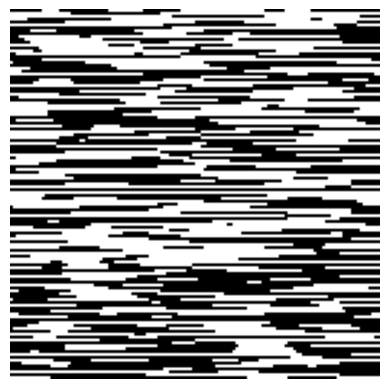

In [8]:
# random initialization of im_bin
sh = [128, 128]
im_bin = 2 - np.ceil(2 * np.random.rand(*sh))

beta_reg = 10

for n in range(50):
    echan_q7a(im_bin, beta_reg)

plt.figure()
plt.imshow(im_bin)
plt.set_cmap("gray")
plt.axis("off")
plt.show()


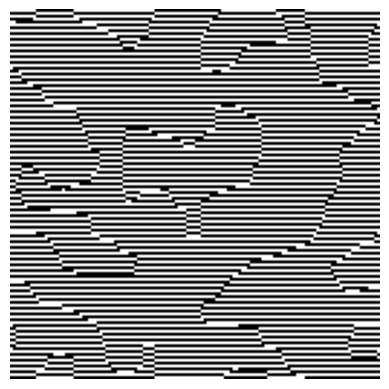

In [9]:
# random initialization of im_bin
sh = [128, 128]
im_bin = 2 - np.ceil(2 * np.random.rand(*sh))

beta_reg = 10

for n in range(50):
    echan_q7b(im_bin, beta_reg)

plt.figure()
plt.imshow(im_bin)
plt.set_cmap("gray")
plt.axis("off")
plt.show()


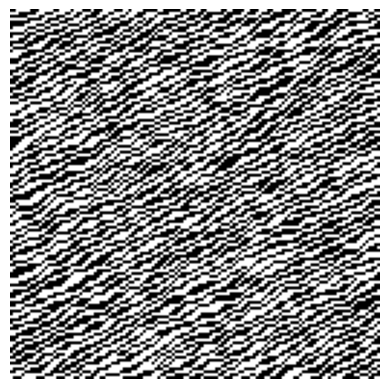

In [10]:
# random initialization of im_bin
sh = [128, 128]
im_bin = 2 - np.ceil(2 * np.random.rand(*sh))

beta_reg = 10

for n in range(50):
    echan_q7c(im_bin, beta_reg)

plt.figure()
plt.imshow(im_bin)
plt.set_cmap("gray")
plt.axis("off")
plt.show()


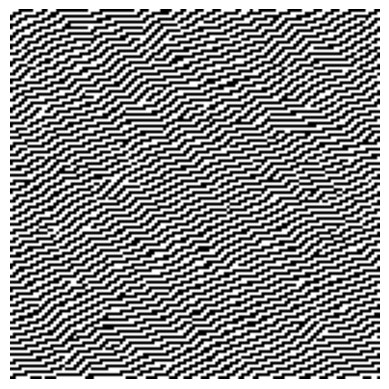

In [11]:
# random initialization of im_bin
sh = [128, 128]
im_bin = 2 - np.ceil(2 * np.random.rand(*sh))

beta_reg = 10

for n in range(50):
    echan_q7d(im_bin, beta_reg)

plt.figure()
plt.imshow(im_bin)
plt.set_cmap("gray")
plt.axis("off")
plt.show()


- A7:

  - Image A: cliques on the horizontal direction have $-1$ potential.
  - Image B: in addition to the previous ones, cliques on the vertical direction have $+1$ potential.
  - Image C: in addition to the previous ones, cliques on the diagonal at $45^\circ$ have $-1$ potential.
  - Image D: in addition to the previous ones, cliques on the diagonal at $135^\circ$ have $+1$ potential.

- Q8: Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.


In [12]:
def echan_q8(im_bin, beta_reg):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1 = (i - 1) % im_bin.shape[0]
            i2 = (i + 1) % im_bin.shape[0]
            j1 = (j - 1) % im_bin.shape[1]
            j2 = (j + 1) % im_bin.shape[1]

            # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = (
                im_bin[i1, j1] + im_bin[i1, j2] + im_bin[i2, j1] + im_bin[i2, j2]
            ) * beta_reg
            p0 = math.exp(-Ureg0)

            # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = (
                4 - (im_bin[i1, j1] + im_bin[i1, j2] + im_bin[i2, j1] + im_bin[i2, j2])
            ) * beta_reg
            p1 = math.exp(-Ureg1)

            # sampling according to the normalized probabilities
            if p0 + p1 != 0.0:
                if random.uniform(0, 1) < p0 / (p0 + p1):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin


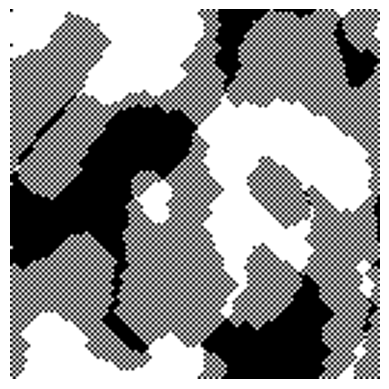

In [13]:
# random initialization of im_bin
sh = [128, 128]
im_bin = 2 - np.ceil(2 * np.random.rand(*sh))

beta_reg = 10

for n in range(50):
    echan_q8(im_bin, beta_reg)

plt.figure()
plt.imshow(im_bin)
plt.set_cmap("gray")
plt.axis("off")
plt.show()


- A8: It is evident that the model accords priority to the most frequent category along the diagonal of the sampled pixel. This outcome manifests either as homogeneous regions in black or white or as a checkered pattern, as illustrated in the image.